<a href="https://colab.research.google.com/github/ankesh86/TimeSeriesAnalysis/blob/main/StasticalUnivariateModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Moving-Average (MA) forecast**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#reading the data
#GDP data from 1929 to 1991
usgdp_data_url = 'https://raw.githubusercontent.com/Apress/time-series-algorithm-recipes/master/data/GDPUS.csv'
usgdp_data = pd.read_csv(usgdp_data_url)

In [3]:
usgdp_data.head()

,Year,GDP
0,1929,821.8
1,1930,748.9
2,1931,691.3
3,1932,599.7
4,1933,587.1


In [4]:
#preprocessing the data
date_rng = pd.date_range(start='1/1/1929', end='31/12/1991', freq='A')
print(date_rng)

usgdp_data['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])

DatetimeIndex(['1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31', '1935-12-31', '1936-12-31',
               '1937-12-31', '1938-12-31', '1939-12-31', '1940-12-31',
               '1941-12-31', '1942-12-31', '1943-12-31', '1944-12-31',
               '1945-12-31', '1946-12-31', '1947-12-31', '1948-12-31',
               '1949-12-31', '1950-12-31', '1951-12-31', '1952-12-31',
               '1953-12-31', '1954-12-31', '1955-12-31', '1956-12-31',
               '1957-12-31', '1958-12-31', '1959-12-31', '1960-12-31',
               '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
               '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31',
               '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
      

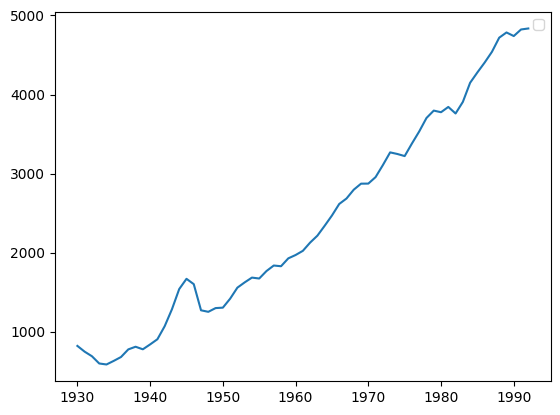

In [5]:
#plotting time-series
plt.plot(usgdp_data.TimeIndex, usgdp_data.GDP)
plt.legend(loc='best')
plt.show()

In [6]:
#using rolling mean to get Moving Average
mvg_avg_usgdp = usgdp_data.copy()

#calculating the rolling mean - with window 5
mvg_avg_usgdp['moving_avg_forecast'] = usgdp_data['GDP'].rolling(5).mean()

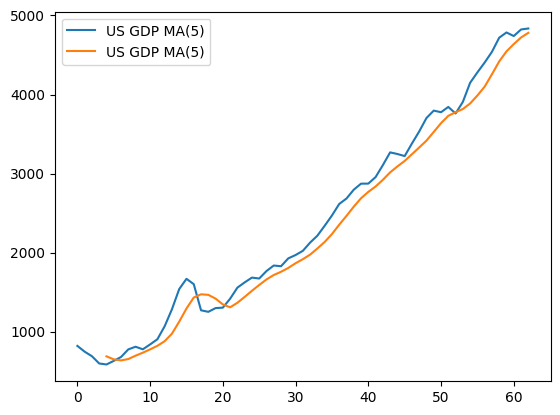

In [7]:
plt.plot(usgdp_data['GDP'], label='US GDP MA(5)')
plt.plot(mvg_avg_usgdp['moving_avg_forecast'], label = 'US GDP MA(5)')
plt.legend(loc = 'best')
plt.show()

## **Auto-Regressive (AR) Model**

### Definition

An AR model predicts future values based on past values of the same series. It is defined as:

\[
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t
\]

Where:
- \(X_t\) is the series value at time \(t\),
- \(c\) is a constant,
- \(\phi_1, \phi_2, \dots, \phi_p\) are the parameters of the model,
- \(p\) is the order of the model (the number of past values considered),
- \(\epsilon_t\) is white noise at time \(t\).

### Fitting the Model

The parameters (\(\phi_1, \phi_2, \dots, \phi_p\)) are typically estimated to minimize prediction errors, using methods like Yule-Walker equations, Maximum Likelihood Estimation, or Least Absolute Shrinkage and Selection Operator (LASSO).

### Model Selection

The order \(p\) of the AR model is crucial and can be determined using criteria like the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or Hannan-Quinn criterion, balancing between model fit and complexity.

### Applications

- **Economic Forecasting**: For predicting economic indicators like GDP, inflation rates, or stock prices.
- **Signal Processing**: Useful in engineering for filtering and smoothing signals.
- **Weather Forecasting**: Used to predict parameters such as temperature and wind speed.

### Assumptions

- **Stationarity**: The series should be stationary. Non-stationary series require differencing or other transformations.
- **Independence of Error Terms**: The noise \(\epsilon_t\) should be white noise, i.e., normally distributed, independent, and with a mean of zero.

AR models are powerful for time series forecasting but require careful data preparation and parameter tuning.


In [8]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf

In [9]:
# load and plot dataset
data_url = 'https://raw.githubusercontent.com/Apress/time-series-algorithm-recipes/master/data/opsd_germany_daily.csv'
data = pd.read_csv(data_url, sep = ',')
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


<Axes: >

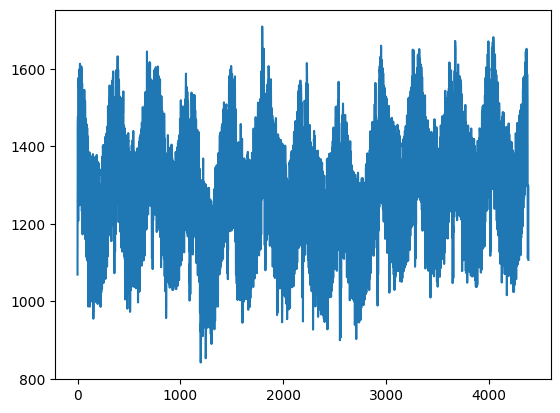

In [10]:
data['Consumption'].plot()

P-value: This is the probability of observing the test results under the null hypothesis. In the context of the ADF test, a low p-value (typically < 0.05) indicates strong evidence against the null hypothesis, so you can reject the null hypothesis and conclude the series is likely stationary.

In [11]:
#checking for the stationary of the Time Series Data
data_stationary_test = adfuller(data['Consumption'], autolag='AIC')
print("P-value: ", data_stationary_test[1])

#autolag='AIC': This argument tells the function to automatically select the lag length that minimizes the Akaike Information Criterion (AIC), which balances the complexity of the model against its fit to the data.
#data_stationary_test[1]: This accesses the second element of the tuple returned by adfuller, which is the p-value of the test.

P-value:  4.7440549018425884e-08


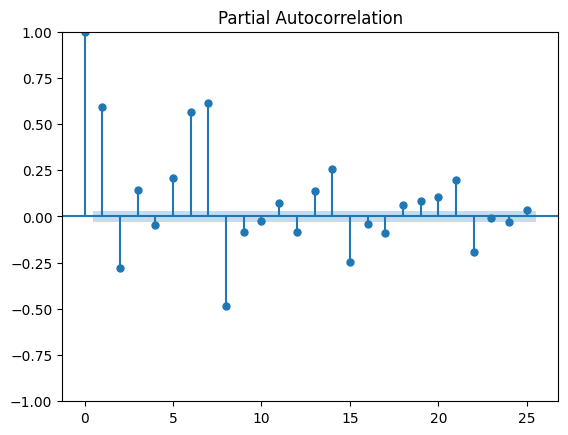

In [12]:
#  find the AR model to be trained
pacf = plot_pacf(data['Consumption'], lags=25)

#Strong Initial Lag: The first lag (at lag 1) shows a significant partial autocorrelation close to 1. This indicates a strong correlation with the immediate previous value.
#Other Significant Lags: Other lags with noticeable spikes include lags 2, 5, 10, and 12. These lags show significant partial correlations and suggest potential orders for the AR model.

In [13]:
#creating a training and test data
train_df = data['Consumption'][:len(data)-100]
test_df = data['Consumption'][len(data)-100:]

In [14]:
ar_model = AutoReg(train_df, lags = 8).fit()

In [15]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Mon, 10 Jun 2024   AIC                          48483.625
Time:                        23:17:00   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

The summary of the AutoRegressive (AR) model fitting provided indicates that an AR(8) model has been applied to the 'Consumption' time series data, which includes 4283 observations. The model fitting utilized Conditional Maximum Likelihood Estimation, achieving a log likelihood of -24231.812 and standard deviation of innovations at 70.058. Various model selection criteria were reported, including AIC, BIC, and HQIC, which help evaluate the model's fit and complexity. The coefficients for the model show significant contributions from the first, second, third, fourth, sixth, seventh, and eighth lags, suggesting these past values are important predictors of current 'Consumption'. Notably, the seventh and eighth lags showed particularly strong effects, positive and negative respectively, indicating specific weekly patterns in the data. Roots of the characteristic equation confirmed the model's stability, as all moduli are greater than one. This suggests that the effects of shocks to the system will diminish over time, a key characteristic of a stable AR process. While the model captures significant dynamics with certain lags, the insignificant lag (fifth) suggests there might be potential for model simplification. Overall, this AR(8) model effectively delineates the dynamics within the 'Consumption' data, providing insights into its time-dependent structure and potential predictive capabilities.

In [16]:
#train_df = data['Consumption'][:len(data)-100]
data['Consumption'][len(data)-100:]


4283    1191.10345
4284    1115.07288
4285    1419.59171
4286    1445.40606
4287    1451.00792
           ...    
4378    1263.94091
4379    1299.86398
4380    1295.08753
4381    1215.44897
4382    1107.11488
Name: Consumption, Length: 100, dtype: float64

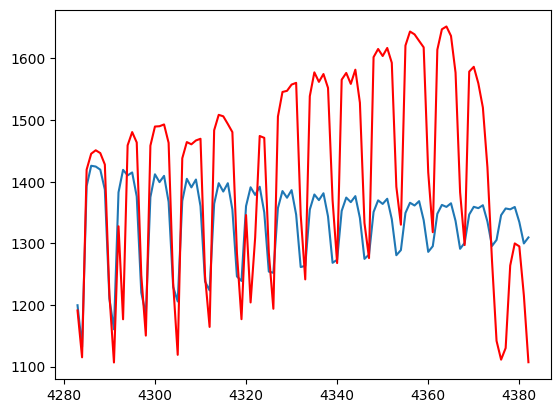

In [17]:
#getting the predictions
predictions = ar_model.predict(start=len(train_df), end =(len(data)-1), dynamic = False)

#plotting the predictions
from matplotlib import pyplot
pyplot.plot(predictions)
pyplot.plot(test_df, color='red')

# **Autoregressive Moving Average (ARMA) model**

### Components of the ARMA Model

1. **Autoregressive (AR) Part**: Models the current value of the time series as a linear combination of its previous values, capturing the persistence of the series.
   \[
   \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p}
   \]
   where \( \phi_i \) are the model parameters for the AR part.

2. **Moving Average (MA) Part**: Models the current value as a linear combination of past error terms, capturing shocks or random disturbances.
   \[
   \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
   \]
   where \( \theta_i \) are the model parameters for the MA part, and \( \epsilon_t \) are white noise error terms.

### The ARMA Model Equation

The ARMA model, combining the AR and MA components, can be expressed as:
\[
X_t = c + \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}
\]
where \( c \) is a constant.

### Stationarity and Invertibility

- **Stationarity**: The AR part must be stationary, typically requiring the roots of the characteristic equation to lie outside the unit circle.
- **Invertibility**: The MA part should be invertible, also requiring the roots to lie outside the unit circle.

### Fitting the ARMA Model

- **Parameter Estimation**: Usually performed using Maximum Likelihood Estimation (MLE) or the Kalman filter.
- **Model Selection**: The orders \( p \) and \( q \) are chosen based on the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC).
- **Diagnostics**: Checking the residuals to ensure they resemble white noise, indicating a good model fit.

### Applications

ARMA models are used extensively across various fields such as economics, finance, engineering, and environmental science for:
- Economic forecasting
- Stock price analysis
- Signal processing

### Conclusion

The ARMA model offers a robust framework for analyzing and forecasting time series data that exhibits both momentum and shock effects, making it a valuable tool in many quantitative disciplines.


In [18]:
#importing the libraries
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [19]:
#loading the data
bitcoin_price_url = 'https://raw.githubusercontent.com/Apress/time-series-algorithm-recipes/master/data/btc.csv'
btc_data = pd.read_csv(bitcoin_price_url)
print(btc_data.head())


         Date       BTC-USD
0  2017-12-31  14156.400391
1  2018-01-01  13657.200195
2  2018-01-02  14982.099609
3  2018-01-03  15201.000000
4  2018-01-04  15599.200195


In [20]:
# preprocesing the data
btc_data.index = pd.to_datetime(btc_data['Date'], format = '%Y-%m-%d')
del btc_data['Date']

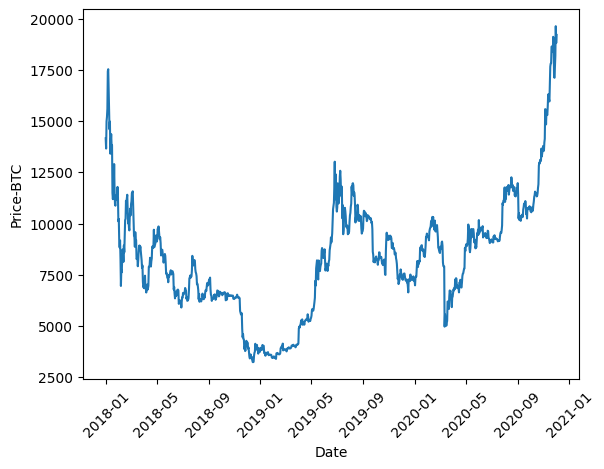

In [21]:
#plotting the time-series
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc_data.index, btc_data['BTC-USD'],)

## Test-train split

In [22]:
train_data = btc_data[btc_data.index < pd.to_datetime("2020-11-01", format= '%Y-%m-%d')]
test_data = btc_data[btc_data.index > pd.to_datetime("2020-11-01", format= '%Y-%m-%d')]
print(train_data.shape)
print(test_data.shape)

(1036, 1)
(31, 1)


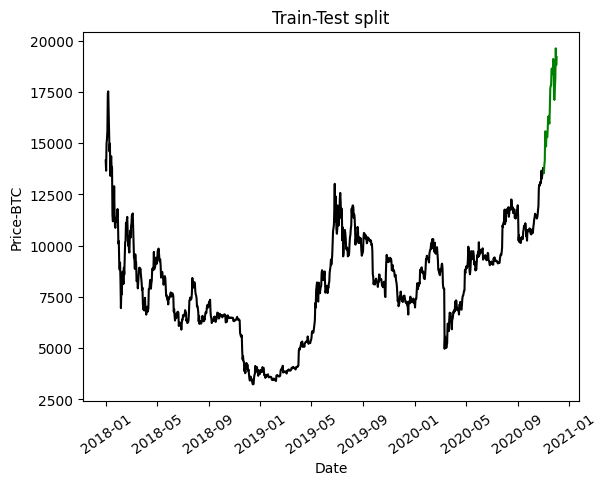

In [23]:
#plotting the time series after the test-train split
plt.plot(train_data, color='black', label = 'Train')
plt.plot(test_data, color='green', label='Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title('Train-Test split')
plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
#defining the actuals from training
actuals = train_data['BTC-USD']

#initialise and fit the ARMA model
ARMA_model = ARIMA(actuals, order = (1,0,1))
ARMA_model = ARMA_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Initialization of ARMA Model:

* ARIMA(actuals, order=(1,0,1)): This function call initializes an ARMA model. Although ARIMA stands for AutoRegressive Integrated Moving Average, setting the middle parameter of the order tuple to zero (I=0) reduces it to an ARMA model. The order tuple (p, d, q) here specifies:
** p=1: The number of lag observations included in the model (AR part).
** d=0: The degree of differencing (none in this case, indicating that the data is already stationary).
** q=1: The size of the moving average window (MA part).
Fitting the Model:

* .fit(): This method fits the ARMA model to the provided data actuals. It computes the coefficients for the model based on the data and finds the best values that minimize the error in prediction.

In [26]:
# Getting the forecast for the length of the test dataset
predictions = ARMA_model.get_forecast(len(test_data.index))

# Obtaining the confidence intervals for the forecasts
predictions_df = predictions.conf_int(alpha=0.05)

# Adding actual predictions to the DataFrame
predictions_df["Predictions"] = ARMA_model.predict(start=predictions_df.index[0], end=predictions_df.index[-1])

# Aligning the forecast DataFrame's index with the test data index
predictions_df.index = test_data.index

# Extracting the predictions into a Series
predictions_arma = predictions_df["Predictions"]


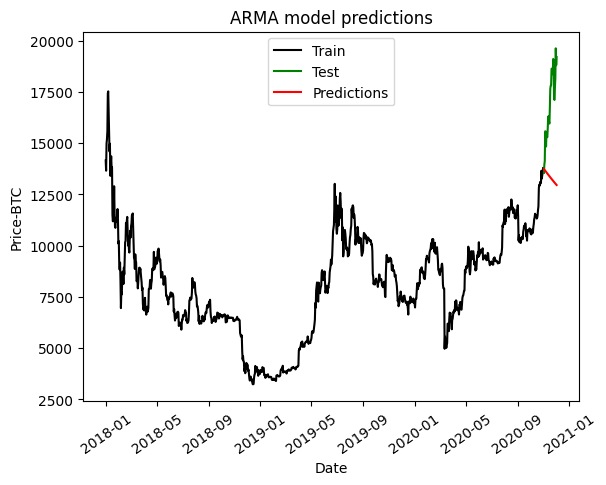

In [27]:
#plotting the train, test and predictions
plt.plot(train_data, color='black', label = 'Train')
plt.plot(test_data, color='green', label='Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title('ARMA model predictions')
plt.plot(predictions_arma, color='red', label='Predictions')
plt.legend()
plt.show()

In [28]:
#calculating the RMSE score for the model
rmse_arma = np.sqrt(mean_squared_error(test_data['BTC-USD'].values, predictions_df['Predictions']))
print("RMSE: ", rmse_arma)

RMSE:  4017.145135160899


#**Autoregressive Integrated Moving Average (ARIMA) model**

### Components of the ARIMA Model

ARIMA models are characterized by three parameters: \(p\), \(d\), and \(q\):

- **\(p\)**: Autoregressive part (AR). The number of lag observations included in the model, representing the relationship between the current value and its previous values.
- **\(d\)**: Integrated part (I). The number of differencing required to make the time series stationary.
- **\(q\)**: Moving Average part (MA). The size of the moving average window, modeling the relationship between the current value and the residuals from the MA model applied to lagged observations.

### Mathematical Representation

The ARIMA model can be expressed as:
\[
(1 - \phi_1B - \phi_2B^2 - \dots - \phi_pB^p)(1 - B)^d X_t = (1 + \theta_1B + \theta_2B^2 + \dots + \theta_qB^q) \epsilon_t
\]
where:
- \(B\) is the backshift operator, \(BX_t = X_{t-1}\).
- \(X_t\) is the time series.
- \(\phi_1, \phi_2, \dots, \phi_p\) are the parameters of the AR part.
- \(\theta_1, \theta_2, \dots, \theta_q\) are the parameters of the MA part.
- \(\epsilon_t\) is white noise error terms.

### Stationarity and Differencing

Ensuring stationarity in the time series is crucial in ARIMA modeling. This may involve differencing the series to achieve constant mean and variance.

### Model Building Process

1. **Identification**: Determine \(p\), \(d\), and \(q\) using Autocorrelation Function (ACF), Partial Autocorrelation Function (PACF), and stationarity tests like the Augmented Dickey-Fuller test.
2. **Estimation**: Estimate the model parameters using techniques such as Maximum Likelihood Estimation (MLE).
3. **Diagnostic Checking**: Analyze the residuals to ensure they resemble white noise, utilizing residual plots and ACF plots of residuals.
4. **Forecasting**: Employ the model for future forecasting and validate the accuracy to ensure the model's effectiveness.

### Applications

ARIMA models are versatile and are employed in various fields including economic forecasting, stock market analysis, and inventory studies, wherever time series forecasting is essential.


In [29]:
#making data stationary by differencing
#differencing
ts_diff = actuals - actuals.shift(periods=4)
ts_diff.dropna(inplace=True)

In [30]:
#checking the ADF(Augmented-Dickey - Fuller)
#checking for stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff)
pval = result[1]
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])

ADF Statistic: -6.124168
p-value: 0.000000


In [32]:
#get the auto-correlation function and partial auto-correlation function values
from statsmodels.tsa.stattools import adfuller
# Importing the necessary functions
from statsmodels.tsa.stattools import acf, pacf

# Assuming ts_diff is your time series data after differencing
# Calculate the Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF)
lag_acf = acf(ts_diff, nlags=20) #, fft=True)  # Use fft=True for large time series data
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

#fft=True is used in the acf function to efficiently compute the autocorrelation when the data set is large.
#method='ols' in the pacf function specifies that the ordinary least squares method is used to estimate the partial autocorrelations.

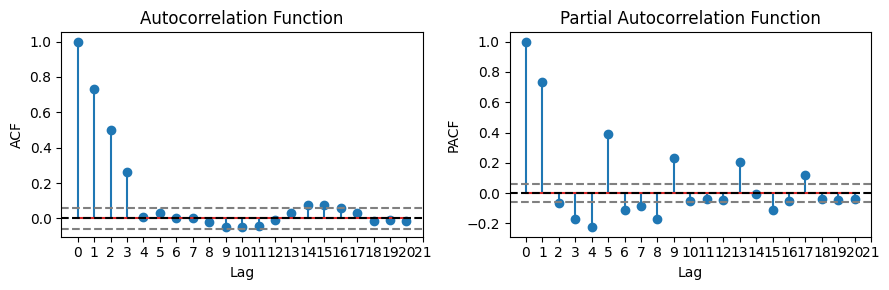

In [34]:
#plot the ACF and PACF to get p- and q- values
#plotting ACF:
plt.figure(figsize = (9,3))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

#plotting PACF
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=-1.96/np.sqrt(len(actuals)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(actuals)), linestyle='--', color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [39]:
#intializing the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
ARIMA_model = ARIMA(actuals, order = (10,4,1))
ARIMA_model = ARIMA_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

AR (p): The first parameter (10 in your case) is the order of the autoregressive part. It specifies the number of lagged observations in the model. An AR(p) term involves using p previous values in the time series to predict the current value. So, a parameter of 10 means the model uses the previous 10 values to predict the next value.

I (d): The second parameter (4 in your case) is the order of differencing required to make the time series stationary. Differencing involves subtracting the previous observation from the current observation. In this case, differencing the series 4 times might indicate that the original series has seasonal patterns or other complex trends. Usually, 1 or 2 differences suffice for most practical purposes, so a value of 4 is quite high and uncommon, suggesting that the data may have strong seasonal effects or other forms of non-stationarity.

MA (q): The third parameter (1 in your case) is the order of the moving average part. It represents the number of lagged forecast errors that should be included in the ARIMA model. An MA(q) term incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations. Here, a parameter of 1 means the model uses the previous error (the difference between the last observed value and what was predicted by the model) to adjust the current prediction.

In [41]:
# Using the ARIMA model to forecast the values for the length of the test dataset
predictions = ARIMA_model.get_forecast(len(test_data.index))

# Generating a DataFrame with confidence intervals for the forecasts; alpha=0.05 indicates 95% confidence intervals
predictions_df = predictions.conf_int(alpha=0.05)

# Adding a new column 'Predictions' to the DataFrame, which contains the actual forecast values from the ARIMA model
# The 'predict' method is used to generate predictions from the specified start to the end index based on the ARIMA model
predictions_df['Predictions'] = ARIMA_model.predict(start=predictions_df.index[0], end=predictions_df.index[-1])

# Setting the index of the predictions DataFrame to match the index of the test data
# This is important for alignment when comparing forecasts to actual outcomes or when plotting data
predictions_df.index = test_data.index

# Displaying the 'Predictions' column from the DataFrame
# This column contains the forecasted values from the ARIMA model for the test set
predictions_arima = predictions_df['Predictions']


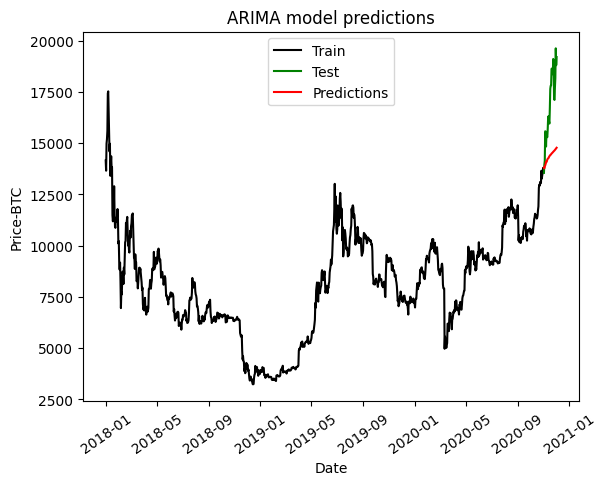

In [42]:
#plotting
plt.plot(train_data, color = 'black', label='Train')
plt.plot(test_data, color = 'green', label='Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("ARIMA model predictions")
plt.plot(predictions_arima, color='red', label='Predictions')
plt.legend()
plt.show()

In [43]:
rmse_arima = np.sqrt(mean_squared_error(test_data['BTC-USD'].values, predictions_df['Predictions']))
print("RMSE: ", rmse_arima)

RMSE:  2895.3669739711527


# **Grid-Search Hyperparameter Tuning for the ARIMA model**

In [44]:
def arima_model_evaluate(train_actuals, test_data, order):
  #model initialize and fit
  ARIMA_model = ARIMA(actuals, order = order)
  ARIMA_model = ARIMA_model.fit()

  #getting the predictions
  predictions = ARIMA_model.get_forecast(len(test_data.index))
  predictions_df = predictions.conf_int(alpha=0.05)
  predictions_df['Predictions'] = ARIMA_model.predict(start=predictions_df.index[0], end= predictions_df.index[-1])
  predictions_df.index = test_data.index

  predictions_arima = predictions_df['Predictions']

  #calculate RMSE score
  rmse_score = np.sqrt(mean_squared_error(test_data['BTC-USD'].values, predictions_df['Predictions']))
  return rmse_score


In [50]:
#function to evalues multiple modelthrough grid seach hyperparameter tuning
def evaluate_models(train_actuals, test_data, list_p_values, list_d_values, list_q_values):
  best_rmse, best_config = float('inf'), None
  for p in list_p_values:
    for d in list_d_values:
      for q in list_d_values:
        arima_order = (p,d,q)
        rmse = arima_model_evaluate(train_actuals, test_data, arima_order)
        if rmse < best_rmse:
          best_rmse, best_config = rmse, arima_order
        print('ARIMA%s RMSE= %.3f' %(arima_order, rmse))
  print('best Configuration: ARIMA%s , RMSE=%.3f' %(best_config, best_rmse))
  return best_config


In [51]:
#perform the grid search hyperparameter tuning by calling the defined function
p_values = range(0,4)
d_values = range(0,4)
q_values = range(0,4)
warnings.filterwarnings("ignore")
best_config = evaluate_models(actuals, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE= 8973.269
ARIMA(0, 0, 1) RMSE= 8927.094
ARIMA(0, 0, 2) RMSE= 8895.924
ARIMA(0, 0, 3) RMSE= 8861.499
ARIMA(0, 1, 0) RMSE= 3527.133
ARIMA(0, 1, 1) RMSE= 3537.297
ARIMA(0, 1, 2) RMSE= 3519.475
ARIMA(0, 1, 3) RMSE= 3514.476
ARIMA(0, 2, 0) RMSE= 1112.565
ARIMA(0, 2, 1) RMSE= 3455.709
ARIMA(0, 2, 2) RMSE= 3315.836
ARIMA(0, 2, 3) RMSE= 3337.302
ARIMA(0, 3, 0) RMSE= 30160.941
ARIMA(0, 3, 1) RMSE= 887.423
ARIMA(0, 3, 2) RMSE= 3180.690
ARIMA(0, 3, 3) RMSE= 3045.072
ARIMA(1, 0, 0) RMSE= 4079.516
ARIMA(1, 0, 1) RMSE= 4017.145
ARIMA(1, 0, 2) RMSE= 4065.809
ARIMA(1, 0, 3) RMSE= 4088.472
ARIMA(1, 1, 0) RMSE= 3537.539
ARIMA(1, 1, 1) RMSE= 3535.791
ARIMA(1, 1, 2) RMSE= 3537.341
ARIMA(1, 1, 3) RMSE= 3504.703
ARIMA(1, 2, 0) RMSE= 725.218
ARIMA(1, 2, 1) RMSE= 3489.790
ARIMA(1, 2, 2) RMSE= 3507.105
ARIMA(1, 2, 3) RMSE= 3314.737
ARIMA(1, 3, 0) RMSE= 12360.360
ARIMA(1, 3, 1) RMSE= 727.351
ARIMA(1, 3, 2) RMSE= 2970.201
ARIMA(1, 3, 3) RMSE= 2985.182
ARIMA(2, 0, 0) RMSE= 4014.318
ARIMA(2, 0,

In [56]:
#initalize and fit the ARIMA model witht he best configuration
ARIMA_model = ARIMA(actuals, order= best_config)
ARIMA_model = ARIMA_model.fit()

In [61]:
#test predictions
predictions = ARIMA_model.get_forecast(len(test_data.index))
predictions_df = predictions.conf_int(alpha=0.05)
predictions_df["Predicitons"] = ARIMA_model.predict(start=predictions_df.index[0], end=predictions_df.index[-1])
predictions_df.index = test_data.index
predictions_df["Predicitons"]

Date
2020-11-02    13947.416743
2020-11-03    14150.640658
2020-11-04    14333.961737
2020-11-05    14528.046355
2020-11-06    14716.310005
2020-11-07    14907.721660
2020-11-08    15097.430860
2020-11-09    15288.060755
2020-11-10    15478.192734
2020-11-11    15668.593988
2020-11-12    15858.849617
2020-11-13    16049.184001
2020-11-14    16239.475794
2020-11-15    16429.790620
2020-11-16    16620.092990
2020-11-17    16810.402096
2020-11-18    17000.707559
2020-11-19    17191.014993
2020-11-20    17381.321360
2020-11-21    17571.628304
2020-11-22    17761.934937
2020-11-23    17952.241738
2020-11-24    18142.548448
2020-11-25    18332.855207
2020-11-26    18523.161939
2020-11-27    18713.468686
2020-11-28    18903.775425
2020-11-29    19094.082168
2020-11-30    19284.388909
2020-12-01    19474.695651
2020-12-02    19665.002393
Name: Predicitons, dtype: float64

In [62]:
predictions_arima = predictions_df["Predicitons"]

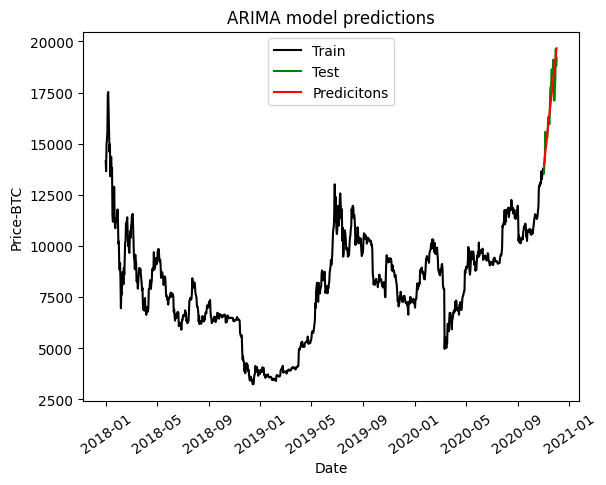

In [63]:
#plot the train, test and predicitons
plt.plot(train_data, color='black', label='Train')
plt.plot(test_data, color='green', label='Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("ARIMA model predictions")
plt.plot(predictions_arima, color='red', label='Predicitons')
plt.legend()
plt.show()

In [65]:
#claculating RMSE score
rmse_arima = np.sqrt(mean_squared_error(test_data['BTC-USD'].values, predictions_df['Predicitons']))
print('RMSE: ',rmse_arima)


RMSE:  725.2180143472168


# **Seasonal Autoregressive Integrated Moving Average (SARIMA) model**

The Seasonal Autoregressive Integrated Moving Average (SARIMA) model is an extension of the ARIMA model that specifically addresses and models seasonal variations in time series data. SARIMA is highly effective for time series with strong seasonal effects, allowing the model to account for seasonality on top of trends and other cyclical changes.

### Components of SARIMA

SARIMA models are usually denoted as SARIMA(p, d, q)(P, D, Q)s, where:

- **p**: The number of autoregressive terms (AR part).
- **d**: The number of differences needed to make the time series stationary (Integrated part).
- **q**: The number of moving average terms (MA part).

The seasonal elements of the model are:

- **P**: The number of seasonal autoregressive terms.
- **D**: The number of seasonal differences applied to the series.
- **Q**: The number of seasonal moving average terms.
- **s**: The length of the seasonal cycle.

### How SARIMA Works

#### Seasonal Differencing (D and s):

If a time series exhibits strong seasonal patterns, the series will be seasonally differenced by applying differences with a lag corresponding to the length of the season (e.g., differencing a monthly series with a lag of 12 for annual seasonality).

#### Seasonal Autoregressive (P and s):

The model uses values from previous seasons to predict the current value, adjusted by P lags of the seasonal period.

#### Seasonal Moving Average (Q and s):

Similar to the MA component in ARIMA but applied to the seasonal lags of the series, it uses the forecast errors from previous seasonal terms to improve the model's accuracy.

### Example Model: SARIMA(1,1,1)(1,1,1)12

Here, the model is fitted to a monthly time series with:

- **p, d, q** set to 1, indicating moderate non-seasonal AR and MA components and differencing once to achieve stationarity.
- **P, D, Q** also set to 1, representing similar seasonal effects.
- **s** is 12, which corresponds to an annual seasonality in a monthly series.


In [66]:
SARIMA_model = SARIMAX(actuals, order = (1,2,0), seasonal_order = (2,2,2,12))
SARIMA_model = SARIMA_model.fit()

In [68]:
#getting test predictions
predictions = SARIMA_model.get_forecast(len(test_data.index))
predictions_df = predictions.conf_int(alpha=0.05)
predictions_df["Predictions"] = SARIMA_model.predict(start=predictions_df.index[0], end = predictions_df.index[-1])
predictions_df.index = test_data.index
predictions_sarima = predictions_df["Predictions"]

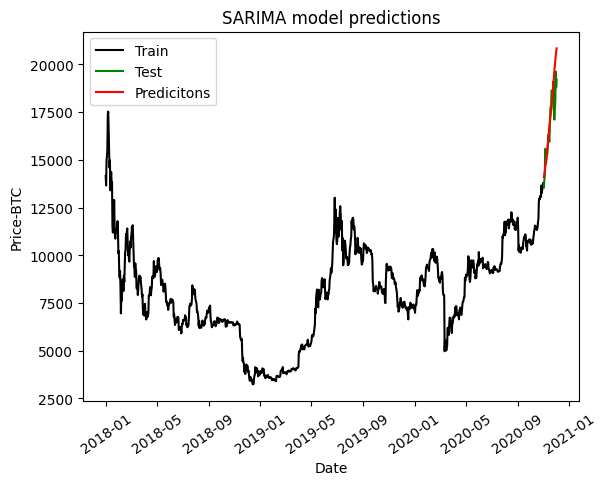

In [69]:
#plot the train, test and predicitons
plt.plot(train_data, color='black', label='Train')
plt.plot(test_data, color='green', label='Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("SARIMA model predictions")
plt.plot(predictions_sarima, color='red', label='Predicitons')
plt.legend()
plt.show()

In [70]:
rmse_sarima = np.sqrt(mean_squared_error(test_data['BTC-USD'].values, predictions_df["Predictions"]))
print("RMSE: ", rmse_sarima)

RMSE:  1049.601992669376


In [73]:
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def sarima_model_evaluate(train_actuals, test_data, order, seasonal_order):
    try:
        SARIMA_model = SARIMAX(train_actuals, order=order, seasonal_order=seasonal_order)
        SARIMA_model = SARIMA_model.fit(disp=0)
    except LinAlgError:
        print(f"Convergence error with order {order} and seasonal_order {seasonal_order}, trying reduced complexity")
        # Reduce differencing or simplify model
        new_order = (order[0], max(0, order[1]-1), order[2])
        new_seasonal_order = (seasonal_order[0], max(0, seasonal_order[1]-1), seasonal_order[2], seasonal_order[3])
        SARIMA_model = SARIMAX(train_actuals, order=new_order, seasonal_order=new_seasonal_order)
        SARIMA_model = SARIMA_model.fit(disp=0)
    # continue with forecast and RMSE calculation
    predictions = SARIMA_model.get_forecast(len(test_data.index))
    predictions_df = predictions.conf_int(alpha=0.05)
    predictions_df['Predictions'] = SARIMA_model.predict(start=predictions_df.index[0], end=predictions_df.index[-1])
    predictions_df.index = test_data.index
    rmse_score = np.sqrt(mean_squared_error(test_data['BTC-USD'].values, predictions_df['Predictions']))
    return rmse_score


def evaluate_sarima_models(train_actuals, test_data, p_values, d_values, q_values, P_values, D_values, Q_values, s):
    best_rmse, best_config = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            sarima_order = (p, d, q)
                            seasonal_order = (P, D, Q, s)
                            rmse = sarima_model_evaluate(train_actuals, test_data, sarima_order, seasonal_order)
                            if rmse < best_rmse:
                                best_rmse, best_config = rmse, (sarima_order, seasonal_order)
                            print('SARIMA%sx%s RMSE=%.3f' % (sarima_order, seasonal_order, rmse))
    print('Best Configuration: SARIMA%sx%s, RMSE=%.3f' % (best_config[0], best_config[1], best_rmse))
    return best_config

In [74]:
# Perform the grid search hyperparameter tuning
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
P_values = range(0, 3)  # Seasonal AR components
D_values = range(0, 2)  # Seasonal Differencing
Q_values = range(0, 3)  # Seasonal MA components
s = 12  # Seasonal length (e.g., 12 for monthly data with annual seasonality)

warnings.filterwarnings("ignore")
best_config = evaluate_sarima_models(actuals, test_data, p_values, d_values, q_values, P_values, D_values, Q_values, s)

SARIMA(0, 0, 0)x(0, 0, 0, 12) RMSE=16973.245
SARIMA(0, 0, 0)x(0, 0, 1, 12) RMSE=15272.916
SARIMA(0, 0, 0)x(0, 0, 2, 12) RMSE=12739.534
SARIMA(0, 0, 0)x(0, 1, 0, 12) RMSE=4142.999


NameError: name 'LinAlgError' is not defined

In [75]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import random

def sarima_model_evaluate(train_actuals, test_data, order, seasonal_order):
    try:
        SARIMA_model = SARIMAX(train_actuals, order=order, seasonal_order=seasonal_order)
        SARIMA_model = SARIMA_model.fit(disp=False)
    except Exception as e:
        print(f"Failed to fit SARIMA model {order}x{seasonal_order}: {str(e)}")
        return float('inf')  # Return a large number to signify a failed model fitting

    predictions = SARIMA_model.get_forecast(len(test_data.index))
    predictions_df = predictions.conf_int(alpha=0.05)
    predictions_df['Predictions'] = SARIMA_model.predict(start=predictions_df.index[0], end=predictions_df.index[-1])
    predictions_df.index = test_data.index

    rmse_score = np.sqrt(mean_squared_error(test_data['BTC-USD'].values, predictions_df['Predictions']))
    return rmse_score

def random_search_sarima_models(train_actuals, test_data, p_values, d_values, q_values, P_values, D_values, Q_values, s, iterations=20):
    best_rmse = float('inf')
    best_config = None

    for _ in range(iterations):
        p = random.choice(p_values)
        d = random.choice(d_values)
        q = random.choice(q_values)
        P = random.choice(P_values)
        D = random.choice(D_values)
        Q = random.choice(Q_values)

        order = (p, d, q)
        seasonal_order = (P, D, Q, s)

        print(f"Testing SARIMA{order}x{seasonal_order}")
        rmse = sarima_model_evaluate(train_actuals, test_data, order, seasonal_order)

        if rmse < best_rmse:
            best_rmse, best_config = rmse, (order, seasonal_order)
            print(f"New best SARIMA{order}x{seasonal_order} with RMSE {rmse}")

    print(f'Best Configuration: SARIMA{best_config[0]}x{best_config[1]}, RMSE={best_rmse}')
    return best_config

# Define ranges for parameters
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
s = 12  # Seasonal period

# Perform random search
best_config = random_search_sarima_models(actuals, test_data, p_values, d_values, q_values, P_values, D_values, Q_values, s, iterations=20)

Testing SARIMA(2, 2, 3)x(2, 1, 1, 12)
New best SARIMA(2, 2, 3)x(2, 1, 1, 12) with RMSE 2916.9049270783953
Testing SARIMA(3, 1, 0)x(2, 1, 0, 12)
New best SARIMA(3, 1, 0)x(2, 1, 0, 12) with RMSE 1646.9026598204225
Testing SARIMA(2, 0, 0)x(1, 0, 0, 12)
Testing SARIMA(3, 3, 0)x(0, 0, 2, 12)
Testing SARIMA(1, 2, 3)x(2, 0, 1, 12)
Testing SARIMA(0, 0, 1)x(0, 0, 0, 12)
Testing SARIMA(1, 2, 3)x(1, 1, 0, 12)
New best SARIMA(1, 2, 3)x(1, 1, 0, 12) with RMSE 985.3642781613322
Testing SARIMA(1, 3, 2)x(2, 1, 0, 12)
Testing SARIMA(2, 0, 2)x(1, 0, 2, 12)
Testing SARIMA(1, 1, 2)x(1, 0, 1, 12)
Testing SARIMA(1, 0, 1)x(1, 1, 2, 12)
Testing SARIMA(0, 0, 1)x(1, 1, 2, 12)
Testing SARIMA(1, 1, 3)x(2, 1, 2, 12)
Testing SARIMA(2, 2, 1)x(0, 0, 0, 12)
Testing SARIMA(3, 1, 1)x(0, 1, 0, 12)
New best SARIMA(3, 1, 1)x(0, 1, 0, 12) with RMSE 812.1203183282971
Testing SARIMA(0, 1, 3)x(0, 1, 1, 12)
Testing SARIMA(1, 3, 1)x(1, 0, 2, 12)
New best SARIMA(1, 3, 1)x(1, 0, 2, 12) with RMSE 721.2982057741234
Testing SARIMA(2,

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assume `best_config` is returned from the grid search and is in the format: ((p,d,q), (P,D,Q,s))
# Extracting the best configuration
best_pdq = best_config[0]  # Non-seasonal parameters
best_seasonal_pdq = best_config[1]  # Seasonal parameters

# Initialize and fit the SARIMAX model with the best configuration
SARIMAX_model = SARIMAX(actuals, order=best_pdq, seasonal_order=best_seasonal_pdq)
SARIMAX_model = SARIMAX_model.fit(disp=False)  # 'disp=False' to turn off convergence messages

# Make forecast for the length of the test data
predictions = SARIMAX_model.get_forecast(len(test_data.index))
predictions_df = predictions.conf_int(alpha=0.05)  # 95% confidence intervals
predictions_df['Predictions'] = SARIMAX_model.predict(start=predictions_df.index[0], end=predictions_df.index[-1])

# Aligning index of the DataFrame to match the test data's index
predictions_df.index = test_data.index
prediction_SARIMA = predictions_df['Predictions']
# Display the predictions
print(predictions_df['Predictions'])


Date
2020-11-02    13950.934657
2020-11-03    14152.112603
2020-11-04    14336.720893
2020-11-05    14528.514939
2020-11-06    14716.410528
2020-11-07    14903.107639
2020-11-08    15089.487473
2020-11-09    15273.760966
2020-11-10    15453.182065
2020-11-11    15632.978602
2020-11-12    15810.809569
2020-11-13    15988.272689
2020-11-14    16164.457971
2020-11-15    16341.155139
2020-11-16    16516.107822
2020-11-17    16689.997498
2020-11-18    16864.286359
2020-11-19    17035.026286
2020-11-20    17206.610712
2020-11-21    17376.374527
2020-11-22    17540.191208
2020-11-23    17705.034959
2020-11-24    17867.903206
2020-11-25    18030.545879
2020-11-26    18191.835702
2020-11-27    18353.657593
2020-11-28    18513.721472
2020-11-29    18672.730362
2020-11-30    18832.117035
2020-12-01    18987.981302
2020-12-02    19144.667655
Name: Predictions, dtype: float64


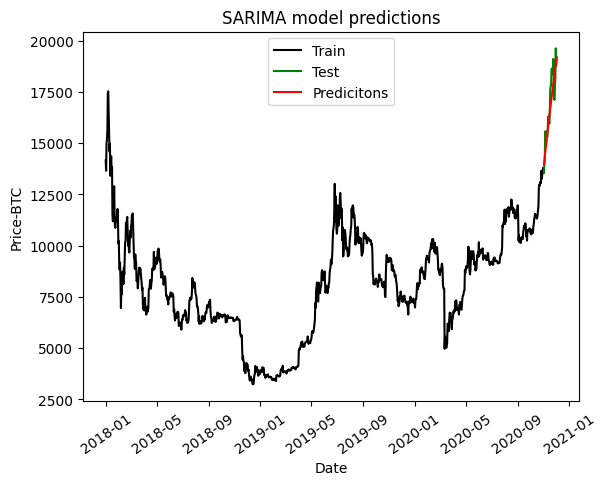

In [78]:
#plot the train, test and predicitons
plt.plot(train_data, color='black', label='Train')
plt.plot(test_data, color='green', label='Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("SARIMA model predictions")
plt.plot(prediction_SARIMA, color='red', label='Predicitons')
plt.legend()
plt.show()